<a href="https://colab.research.google.com/github/erdogan98/DATA_SCIENCE/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers

In [34]:
'''
autoencoder takes an image and maps it to point in the latent space
Below is an example of simplest autoencoder example
'''
#size of encoded representation
encoding_dim = 32 #32 flotas -> compression of factor 24.5

#input image
input_img = keras.Input(shape=(784,))
#encoded represantation of the input
encoded = layers.Dense(128, activation ='relu')(input_img)
encoded = layers.Dense(64, activation ='relu')(input_img)
encoded = layers.Dense(32, activation ='relu')(input_img)
#lossy reconstruction of the input
decoded = layers.Dense(64, activation='sigmoid')(encoded)
decoded = layers.Dense(128, activation='sigmoid')(encoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# mapping an input to its represantation
autoencoder = keras.Model(input_img,decoded)

In [35]:
#building another encoder
#this model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

'''
===DECODER MODEL===
'''

#this is encoded input
encoded_input = keras.Input(shape=(encoding_dim,))

#retrieve last layer of the autencoder model
decoder_layer = autoencoder.layers[-1]

#create decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [36]:
#training

#configuring the model to use a per-pixel binary crossentropy loss and adam optimizer
autoencoder.compile(optimizer = 'adam', loss='binary_crossentropy')

In [5]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [37]:
#preprocessig the image

from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()

In [38]:
#normalazing all values between 0 and 1 and flatten images into vectors size of 784

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [39]:
#train autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2801 - val_loss: 0.1939
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1720 - val_loss: 0.1534
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1440 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1280 - val_loss: 0.1203
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1171 - val_loss: 0.1114
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1097 - val_loss: 0.1053
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1047 - val_loss: 0.1013
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1012 - val_loss: 0.0985
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0989 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0973 - val_loss: 0.0953

In [41]:
#encode and decode some digits
# taking them from *test* set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

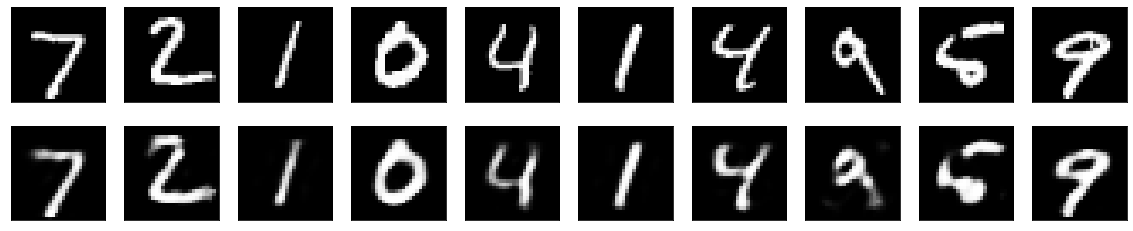

In [42]:
import matplotlib.pyplot as plt

#n is the number of digits that will be displayed
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()